# Exploratory Analysis of Global Air Pollution Dataset (WHO)


Internationally, the importance of Clean Air has recently been recognized and legislated for. On 28 July, the UN General Assembly adopted a resolution which declared access to a clean, healthy, and sustainable environment to be a universal human right.

Good air quality is essential for our health as particles in the air can damage our lungs, hearts, and brains and cause a host of other health problems.

In this project, I explored the World Health Organization's Global Pollution Dataset (2021).

Dataset:
Data downloaded from WHO. (https://www.who.int/data/gho/data/themes/air-pollution/who-air-quality-database)

The WHO Ambient Air Quality Database compiles data on ground measurements of annual mean concentrations of nitrogen dioxide (NO2), particulate matter of a diameter equal or smaller than 10 μm (PM10) or equal or smaller than 2.5 μm (PM2.5) which aim at representing an average for the city or town as a whole, rather than for individual stations. Both groups of pollutants originate mainly from human activities related to fossil fuel combustion.

Pollutants:

Particulate matter (PM2.5 and PM10)
PM is a common proxy indicator for air pollution. There is strong evidence for the negative health impacts associated with exposure to this pollutant. The major components of PM are sulfates, nitrates, ammonia, sodium chloride, black carbon, mineral dust and water.

Nitrogen dioxide (NO2)
NO2 is a gas that is commonly released from the combustion of fuels in the transportation and industrial sectors.


Temoral Coverage:

The temporal coverage represents the number of days per year covered by measurements, or any
alternative qualification as provided in the original sources. If data from several monitoring stations
in one city were available, their average temporal coverage was used for the city average.

# Importing libraries and preparing dataset

In [2]:
#Importing libraries

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Extra settings:
# Setting the default size of visualisations
sns.set(rc={'figure.figsize': (3.54,3.54)})
sns.set
# Ignore red warnings
pd.options.mode.chained_assignment = None

#Show more columns of dataframe
pd.set_option('display.max_columns', 100)

%matplotlib inline


cmap = ['#377eb8','#ff7f00', '#4daf4a', '#e41a1c', '#984ea3', '#999999']
#Blue: #377eb8
#Orange: #ff7f00
#Green: #4daf4a
#Red: #e41a1c
#Purple: #984ea3
#Gray: #999999



# Set style
sns.set_style('white')

In [4]:
# Import data
data = pd.read_excel(r"C:\Users\Tori\OneDrive\Documents\WHO_air_pollution_data.xlsx")

In [5]:
#plt.style.available

In [6]:
# Read data
data.head()

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022,NaN
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022,NaN
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022,NaN
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022,NaN
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022,NaN


In [7]:
#Check datatypes for columns
print(data.dtypes)

WHO Region                                 object
ISO3                                       object
WHO Country Name                           object
City or Locality                           object
Measurement Year                            int64
PM2.5 (μg/m3)                             float64
PM10 (μg/m3)                              float64
NO2 (μg/m3)                               float64
PM25 temporal coverage (%)                float64
PM10 temporal coverage (%)                float64
NO2 temporal coverage (%)                 float64
Reference                                  object
Number and type of monitoring stations     object
Version of the database                     int64
Status                                    float64
dtype: object


In [8]:
# Change data types of columns
data['Measurement Year'] = data['Measurement Year'].astype(int)
data['Version of the database'] = data['Version of the database'].astype(int)

In [9]:
# Overview of data set
data.describe()

,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Version of the database,Status
count,32191.000000,15048.000000,21109.000000,22200.000000,7275.000000,5381.000000,19890.000000,32191.000000,0.0
mean,2015.579354,22.920320,30.533252,20.619336,90.794096,90.583500,93.696804,2021.744214,NaN
std,2.752654,17.925906,29.312756,12.133388,14.872681,13.816311,10.451751,1.051897,NaN
min,2000.000000,0.010000,1.040000,0.000000,0.000000,2.568493,1.923077,2016.000000,NaN
25%,2014.000000,10.350000,16.980000,12.000000,88.595890,87.945205,93.207763,2022.000000,NaN
50%,2016.000000,16.000000,22.000000,18.800000,97.000000,96.039000,96.369863,2022.000000,NaN
75%,2018.000000,31.000000,31.300000,27.160000,99.000000,98.938000,98.926941,2022.000000,NaN
max,2021.000000,191.900000,540.000000,210.680000,100.000000,100.000000,100.000000,2022.000000,NaN


In [10]:
# Find duplicates
print("Number of duplicated rows:",data.duplicated(keep=False).sum())

Number of duplicated rows: 0


In [11]:
# Find missing values pr column (NaN)
nan_per_column = data.isna().sum().sort_values(ascending = False)
print(nan_per_column)


Status                                    32191
PM10 temporal coverage (%)                26810
PM25 temporal coverage (%)                24916
Number and type of monitoring stations    23433
PM2.5 (μg/m3)                             17143
NO2 temporal coverage (%)                 12301
PM10 (μg/m3)                              11082
NO2 (μg/m3)                                9991
Reference                                     5
WHO Region                                    1
ISO3                                          0
WHO Country Name                              0
City or Locality                              0
Measurement Year                              0
Version of the database                       0
dtype: int64


In [12]:
# Number of non-NaN values in each column
non_nan_per_column = data.count().sort_values(ascending = False)
print(non_nan_per_column)

ISO3                                      32191
WHO Country Name                          32191
City or Locality                          32191
Measurement Year                          32191
Version of the database                   32191
WHO Region                                32190
Reference                                 32186
NO2 (μg/m3)                               22200
PM10 (μg/m3)                              21109
NO2 temporal coverage (%)                 19890
PM2.5 (μg/m3)                             15048
Number and type of monitoring stations     8758
PM25 temporal coverage (%)                 7275
PM10 temporal coverage (%)                 5381
Status                                        0
dtype: int64


In [13]:
#Shape of table
data.shape

(32191, 15)

In [14]:
#See coloumn names
data.columns

Index(['WHO Region', 'ISO3', 'WHO Country Name', 'City or Locality',
       'Measurement Year', 'PM2.5 (μg/m3)', 'PM10 (μg/m3)', 'NO2 (μg/m3)',
       'PM25 temporal coverage (%)', 'PM10 temporal coverage (%)',
       'NO2 temporal coverage (%)', 'Reference',
       'Number and type of monitoring stations', 'Version of the database',
       'Status'],
      dtype='object')

In [15]:
# Rename Columns 
data = data.rename(columns = {'WHO Region': 'Region', 'WHO Country Name': 'Country', 'City or Locality': 'City/Locality',
       'Measurement Year': 'Measurement_Year', 'PM2.5 (μg/m3)': 'PM2.5(μg/m3)', 'PM10 (μg/m3)': 'PM10(μg/m3)', 'NO2 (μg/m3)': 'NO2(μg/m3)',
       'PM25 temporal coverage (%)': 'PM25_temp._cov.(%)', 'PM10 temporal coverage(%)':'PM10_temp._cov.(%)',
       'NO2 temporal coverage (%)':  'NO2_temp._cov.(%)'})

In [16]:
data['Region'].value_counts()

European Region                 20292
Western Pacific Region           4798
Region of the Americas           3957
South East Asia Region           2514
Eastern Mediterranean Region      438
African Region                    191
Name: Region, dtype: int64

In [17]:
# Rename Regions
data['Region'] = data['Region'].replace({'European Region': 'Europe', 'Western Pacific Region': 'West Pacific ', 'Region of the Americas' : 'America',
                                       'South East Asia Region': 'South East Asia', 'Eastern Mediterranean Region': 'East Mediterranian', 'African Region': 'Africa' })

In [18]:
# Subset dataset (remove columns I am not working with)
data = data[['Region', 
             #'ISO3', 
             'Country', 'City/Locality', 'Measurement_Year',
       'PM2.5(μg/m3)', 'PM10(μg/m3)', 'NO2(μg/m3)', 'PM25_temp._cov.(%)',
       'PM10 temporal coverage (%)', 'NO2_temp._cov.(%)', 'Reference',
       #'Number and type of monitoring stations', 'Version of the database',
       #'Status'
            ]].copy()


# Exploratory Analysis

# Number of measurements and references

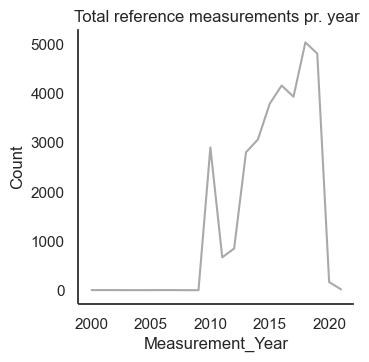

In [23]:
#Find number of total measurements pr. year
Total_assesment_years = data['Measurement_Year'].value_counts().reset_index()
fig = sns.lineplot(data= Total_assesment_years, x='index', y='Measurement_Year', color = 'darkgray')
#fig.set_xticklabels( labels= regions)
fig.set(xlabel='Measurement_Year', ylabel='Count')
fig.set(title = "Total reference measurements pr. year")

# Remove the top and right spines from the plots and add some space between the spines and the axes
sns.despine(offset=1)


plt.show()

We can see that most of the data were collected after 2010, with a deep decline in 2020. (The year of 2020 is also the year Covid-19 shut down much of the world.) 

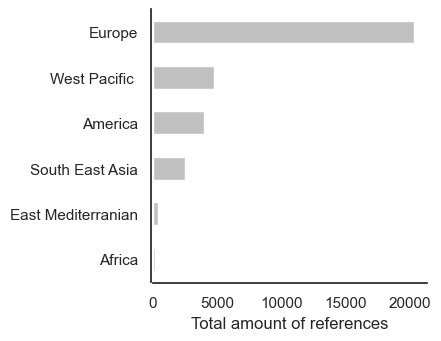

In [24]:
# Find number of measurements pr. region

data_regions = data['Region'].value_counts().sort_values(ascending = True)

ax = data_regions.plot(kind = 'barh', color = 'silver')
#ax.set_yticklabels(
    #ax.set_yticklabels(regions))
ax.set_xlabel('Total amount of references')

# Remove the top and right spines from the plots and add some space between the spines and the axes
sns.despine(offset=1)

plt.show()

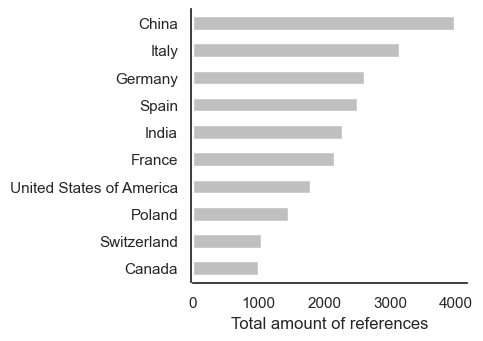

In [25]:
# Find top 10 countries in number of measurements
ax = top_10_countries = data['Country'].value_counts().head(10).sort_values(ascending = True).plot(kind = 'barh', color = 'silver')
ax.set_xlabel('Total amount of references')

# Remove the top and right spines from the plots and add some space between the spines and the axes
sns.despine(offset=1)


plt.show()

We can observe that most of the meassurements are collected from Europe. Of individual countries, China has the highest amout of measurements in the dataset. 

# Measurement Values: Yearly global levels of Pollutiants and overall Distribution of pollutants and Temporal Coverage. 

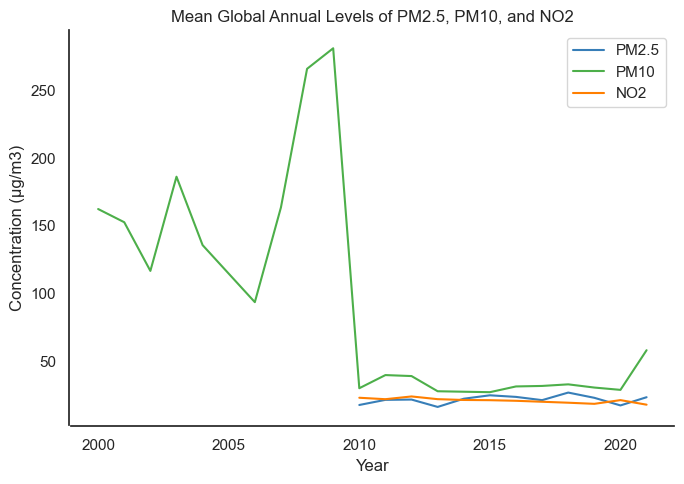

In [26]:
# Calculate average annual levels of pollutants
pollution_trends = data.groupby('Measurement_Year')[['PM2.5(μg/m3)', 'PM10(μg/m3)', 'NO2(μg/m3)']].mean()

# Creating the plot
fig, ax = plt.subplots(figsize=(7, 5))

# Plotting each pollutant with a specific color
ax.plot(pollution_trends['PM2.5(μg/m3)'], color=cmap[0], label='PM2.5')
ax.plot(pollution_trends['PM10(μg/m3)'], color=cmap[2], label='PM10')
ax.plot(pollution_trends['NO2(μg/m3)'], color=cmap[1], label='NO2')

# Setting title and labels
ax.set_title('Mean Global Annual Levels of PM2.5, PM10, and NO2')
ax.set_xlabel('Year')
ax.set_ylabel('Concentration (μg/m3)')

# Remove the top and right spines from the plots and add some space between the spines and the axes
sns.despine(offset=1)

# Adding legend, rotating x-axis labels, and adjusting layout
ax.legend()
plt.tight_layout()
plt.show()


As seen in the figure, data prior to the year of 2010 are missing for PM2.5 and NO2. The levels of PM10 reach a climax in 2010, before drasticly dropping and stabalising before agai increasing from 2020-2021 . The average levels of PM2.5 and NO2 are without drastic changes. 

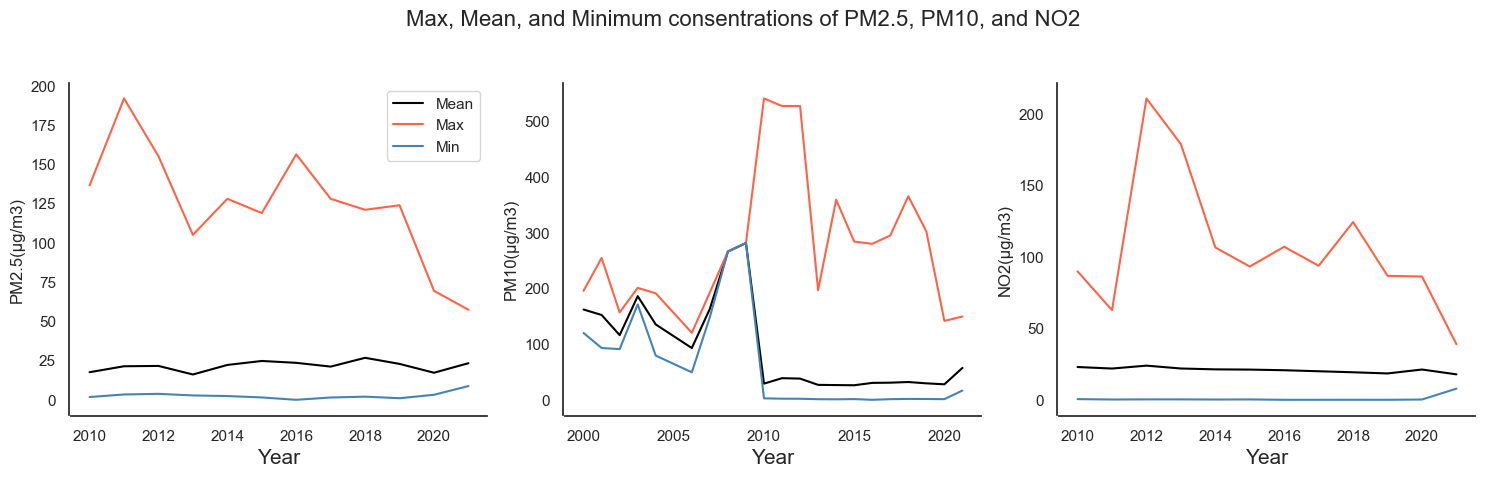

In [27]:

# Create a figure with 6 subplots, sharing the same x-axis and y-axis
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

# Plot the mean and max values of PM2.5 over time
ax1 = sns.lineplot(x= 'Measurement_Year' , y='PM2.5(μg/m3)', data=data, ax=axs[0], estimator=np.mean, color = 'black', errorbar=None,  legend = True)  
ax1 = sns.lineplot(x='Measurement_Year' , y='PM2.5(μg/m3)', data=data, ax=axs[0], estimator=np.max, color = 'tomato' ,errorbar=None,  legend = False)
ax1 = sns.lineplot(x='Measurement_Year' , y='PM2.5(μg/m3)', data=data, ax=axs[0], estimator=np.min, color = 'steelblue', errorbar=None,  legend = False)



# Plot the mean and max values of PM10 over time
ax2 = sns.lineplot(x= 'Measurement_Year' , y='PM10(μg/m3)', data=data, ax=axs[1], estimator=np.mean, color = 'black', errorbar=None,  legend = True)  
ax2 = sns.lineplot(x='Measurement_Year' , y='PM10(μg/m3)', data=data, ax=axs[1], estimator=np.max, color = 'tomato', errorbar=None,  legend = False)
ax2 = sns.lineplot(x='Measurement_Year' , y='PM10(μg/m3)', data=data, ax=axs[1], estimator=np.min, color = 'steelblue', errorbar=None,  legend = False)


# Plot the mean and max values of NO2 over time
ax3 = sns.lineplot(x= 'Measurement_Year' , y='NO2(μg/m3)', data=data, ax=axs[2], estimator=np.mean, color = 'black', errorbar=None,  legend = True)  
ax3 = sns.lineplot(x='Measurement_Year' , y='NO2(μg/m3)', data=data, ax=axs[2], estimator=np.max, color = 'tomato' ,errorbar=None,  legend = False)
ax3 = sns.lineplot(x='Measurement_Year' , y='NO2(μg/m3)', data=data, ax=axs[2], estimator=np.min, color = 'steelblue', errorbar=None,  legend = False)

#Labels and legend
ax1.set_xlabel('Year', fontsize = 15)
ax2.set_xlabel('Year', fontsize = 15)
ax3.set_xlabel('Year', fontsize = 15)

legend_labels = { 'Mean': '#1f77b4', 'Max': '#ff7f0e', 'Min': '#2ca02c'}
ax1.legend(legend_labels)

# Adding a main title for all subplots
plt.suptitle('Max, Mean, and Minimum consentrations of PM2.5, PM10, and NO2', fontsize=16)

# Adjust layout to fit subplots and titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Remove the top and right spines from the plots and add some space between the spines and the axes
sns.despine(offset=1)

plt.show()

We can observe that the maximum meassured consentration varies greatly for all pollutiants, and that there seem to be an overall decrease in maximum measurment values. The average levels (mean) and the minimum levels are somewhat stable, expect from for PM10 prior to the year of 2010.   

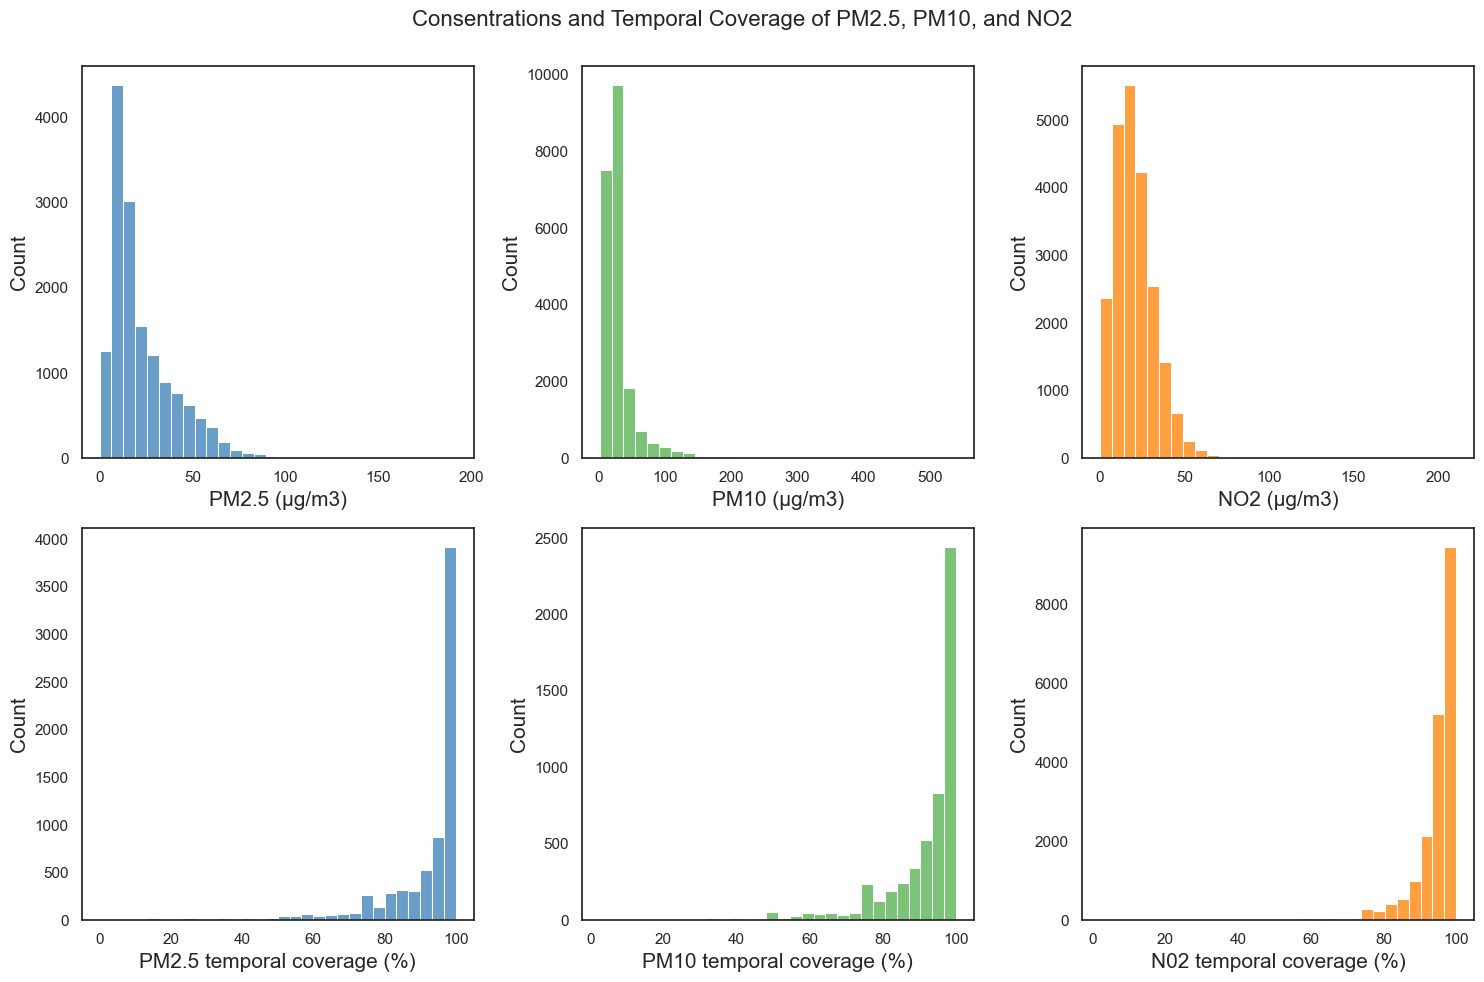

In [28]:
# Create subplots with histograms of consentrations and temporal coverage of pollutants
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))

ax1 = sns.histplot(data=data['PM2.5(μg/m3)'], bins = 30, ax=axs[0,0], color=cmap[0])
ax2 = sns.histplot(data = data['PM10(μg/m3)'], bins = 30, ax=axs[0,1], color =cmap[2])
ax3 = sns.histplot(data = data['NO2(μg/m3)'], bins = 30, ax=axs[0,2], color = cmap[1])
ax4 = sns.histplot(data = data['PM25_temp._cov.(%)'], bins = 30, ax=axs[1,0], color = cmap[0])
ax5 = sns.histplot(data = data['PM10 temporal coverage (%)'], bins = 30, ax=axs[1,1], color = cmap[2])
ax6 = sns.histplot(data = data['NO2_temp._cov.(%)'], bins = 30, ax=axs[1,2], color = cmap[1])


plt.tight_layout()

# Set labels on axes

ax1.set_xlabel('PM2.5 (μg/m3)', fontsize = 15)
ax1.set_ylabel('Count', fontsize = 15)
ax2.set_xlabel('PM10 (μg/m3)', fontsize = 15)
ax2.set_ylabel('Count', fontsize = 15)
ax3.set_xlabel('NO2 (μg/m3)', fontsize = 15)
ax3.set_ylabel('Count', fontsize = 15)
ax4.set_xlabel('PM2.5 temporal coverage (%)', fontsize = 15)
ax4.set_ylabel('Count', fontsize = 15)
ax5.set_xlabel('PM10 temporal coverage (%)', fontsize = 15)
ax5.set_ylabel('Count', fontsize = 15)
ax6.set_xlabel('N02 temporal coverage (%)', fontsize = 15)
ax6.set_ylabel('Count', fontsize = 15)

# Adding a main title for all subplots
plt.suptitle('Consentrations and Temporal Coverage of PM2.5, PM10, and NO2', fontsize=16, x = 0.5)

# Adjust layout to fit subplots and titles
plt.tight_layout(rect=[0, 0, 1, 0.98])


plt.show()

The values of Partical matter pollution (PM2.5 and PM10) are more evenly distributed in the dataset than of Nitrogen dioxide(NO2).
Temporal Coverage levels of all the pollutions are relatively high for the dataset.                                 

# Correlations in dataset

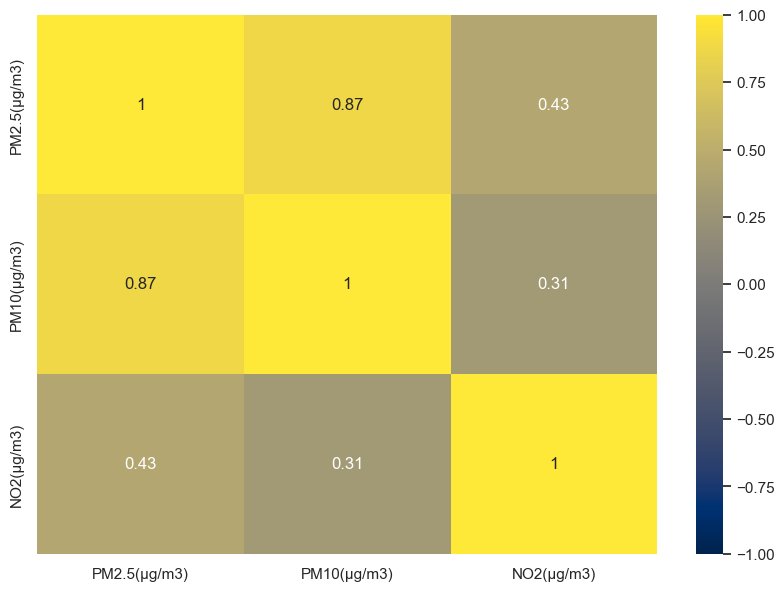

In [31]:
plt.figure(figsize=(10,7))
# Create DataFrame including pollutant consentrations
new_num = data[['PM2.5(μg/m3)', 'PM10(μg/m3)', 'NO2(μg/m3)']]
#rename columns
#new_num.rename(columns = {'PM25 temporal coverage (%)': 'PM25 temp. cov. (%)','PM10 temporal coverage (%)': 'PM10 temp. cov. (%)','NO2 temporal coverage (%)': 'NO2 temp. cov. (%)' }, inplace = True)

#  Find correlations and create heatmap
heat =new_num.corr()
ax = sns.heatmap(heat, vmin=-1.0, vmax=1.0, annot = True, cmap ='cividis')

#ax.title= 'Correlation of pollutants and measuremnts values'

plt.show()


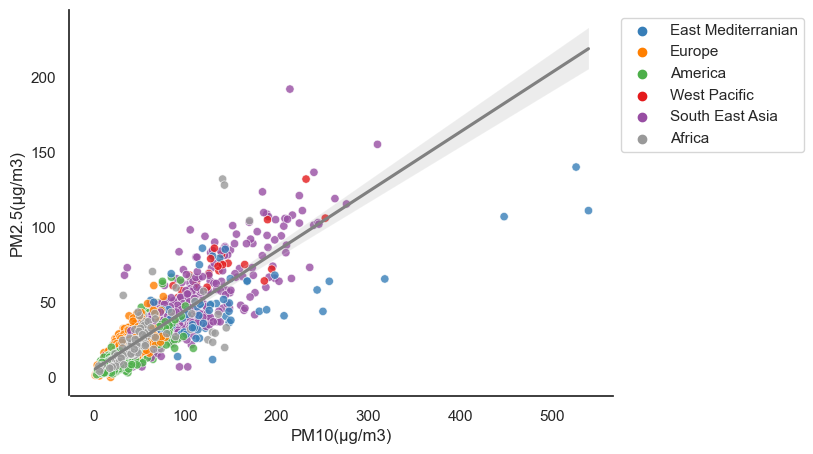

In [30]:
# Plot scatterplot with regression showing the realtionshp between PM2.5 and PM10 consentrations
plt.figure(figsize=(7,5))
ax = sns.scatterplot(data=data, x="PM10(μg/m3)", y="PM2.5(μg/m3)", hue="Region", alpha=0.8, palette =cmap)

# Move the legend to the right of the plot
ax.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=True, fontsize=11)

# Overlay the regression line
sns.regplot(data=data, x="PM10(μg/m3)", y="PM2.5(μg/m3)", scatter=False, ax=ax, color='gray')

# Despine
sns.despine(offset=1, trim=False)

plt.show()


We can observe a relatively strong positive correlation between levels of PM2.5 and PM10. However, the highest measurements of the two pollutants are more spread out, indicating some independence in the creation/release of the two pollutants. 

# Regional Consentrations

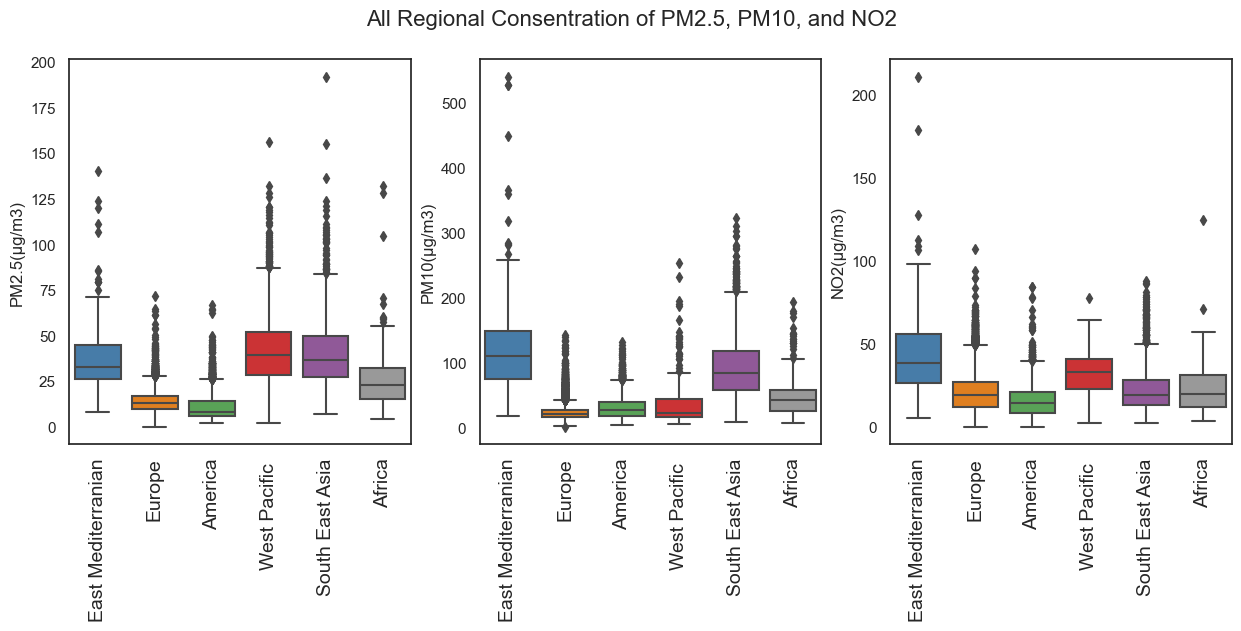

In [27]:
# Create subplots with boxplots showing regional consentrations of pollutants
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(15, 5))

ax1 = sns.boxplot(x='Region', y='PM2.5(μg/m3)', data=data, ax=axs[0], palette = cmap)
ax2 = sns.boxplot(x='Region', y='PM10(μg/m3)', data=data, ax=axs[1],  palette = cmap)
ax3 = sns.boxplot(x='Region',y='NO2(μg/m3)', data=data, ax=axs[2],  palette = cmap)


# Rotate tick labels and adjust size:
for ax in [ax1, ax2, ax3]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14)
# Remove x label
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')



# Adding a main title for all subplots
plt.suptitle('All Regional Consentration of PM2.5, PM10, and NO2', fontsize=16, x = 0.5)

# Adjust layout to fit subplots and titles
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.show()

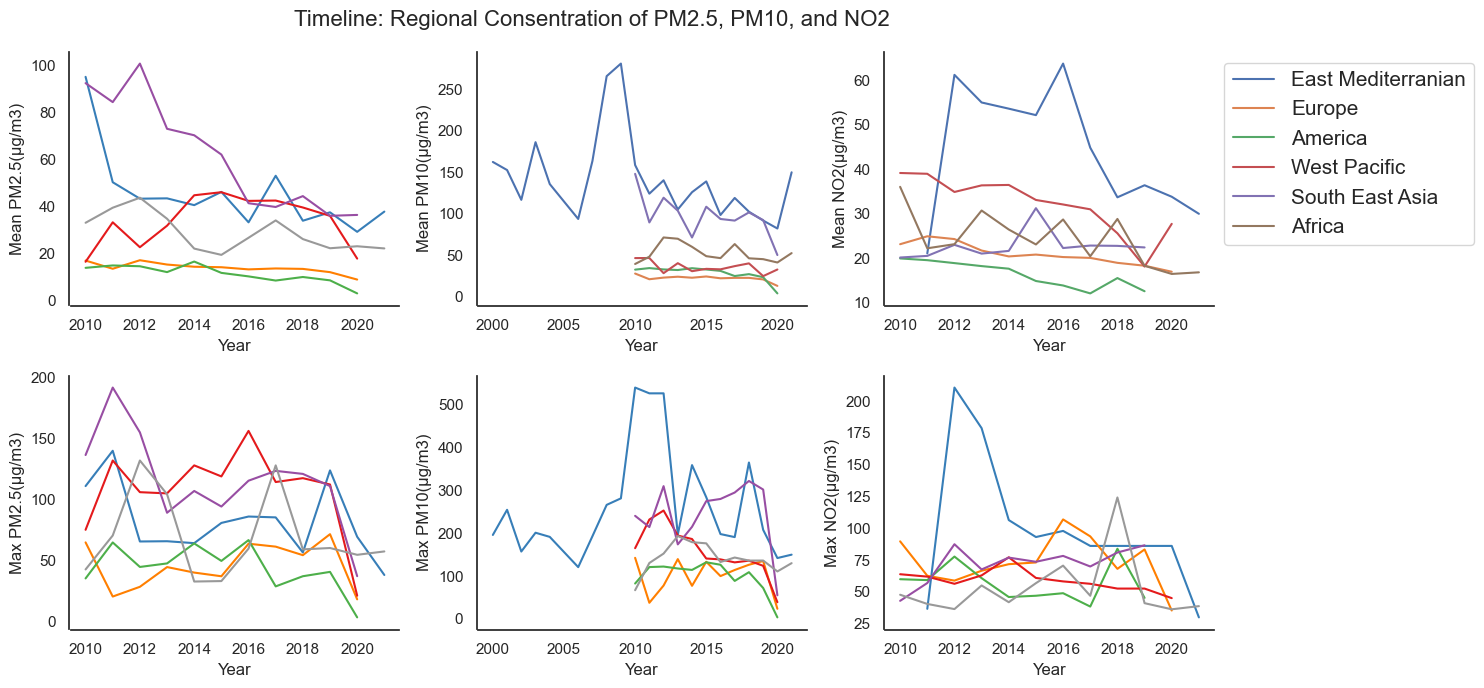

In [28]:
# Create a figure with subplots of timelines(lineplots), sharing the same x-axis and y-axis
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 7))

# Plot the mean and max values of PM2.5, PM10, and NO2 for each region over time
ax1 = sns.lineplot(x= 'Measurement_Year', y='PM2.5(μg/m3)', hue = 'Region', data=data, ax=axs[0,0],  palette = cmap, estimator=np.mean, errorbar=None,  legend = False)  
ax2 = sns.lineplot(x='Measurement_Year' , y='PM10(μg/m3)', hue = 'Region', data=data, ax=axs[0,1], estimator=np.mean, errorbar=None,  legend = False)
ax3 = sns.lineplot(x='Measurement_Year' , y='NO2(μg/m3)', hue = 'Region', data=data, ax=axs[0,2], estimator=np.mean, errorbar=None,  legend = True)

ax4 = sns.lineplot(x= 'Measurement_Year', y='PM2.5(μg/m3)', hue = 'Region', data=data, ax=axs[1,0],  palette = cmap, estimator=np.max,errorbar=None, legend = False) 
ax5 = sns.lineplot(x='Measurement_Year' , y='PM10(μg/m3)', hue = 'Region', data=data, ax=axs[1,1],  palette = cmap, estimator=np.max, errorbar=None, legend = False)
ax6 = sns.lineplot(x='Measurement_Year' , y='NO2(μg/m3)', hue = 'Region', data=data, ax=axs[1,2],  palette = cmap, estimator=np.max, errorbar=None, legend = False)

# Set labels on axes
ax1.set_ylabel('Mean PM2.5(μg/m3)', fontsize = 12)
ax2.set_ylabel('Mean PM10(μg/m3)', fontsize = 12)
ax3.set_ylabel('Mean NO2(μg/m3)', fontsize = 12)
ax4.set_ylabel('Max PM2.5(μg/m3)', fontsize = 12)
ax5.set_ylabel('Max PM10(μg/m3)', fontsize = 12)
ax6.set_ylabel('Max NO2(μg/m3)', fontsize = 12)

ax1.set_xlabel('Year', fontsize = 12)
ax2.set_xlabel('Year', fontsize = 12)
ax3.set_xlabel('Year', fontsize = 12)
ax4.set_xlabel('Year', fontsize = 12)
ax5.set_xlabel('Year', fontsize = 12)
ax6.set_xlabel('Year', fontsize = 12)

# Move the legend to the right of the third subplot
ax3.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon = True, fontsize =15)


# Adding a main title for all subplots
plt.suptitle('Timeline: Regional Consentration of PM2.5, PM10, and NO2', fontsize=16, x = 0.4)

# Adjust layout to fit subplots and titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Remove the top and right spines from the plots and add some space between the spines and the axes
sns.despine(offset=1) 

# Adjust the layout of the subplots
plt.tight_layout()

# Show the figure
plt.show()


# Most polluted cities (2015-2021)

In [29]:
#Subsetting the data in new dataframe in order to see latest trends (2016-)

after2014 = (data['Measurement_Year'] >= 2015)

data1= data.loc[after2014]

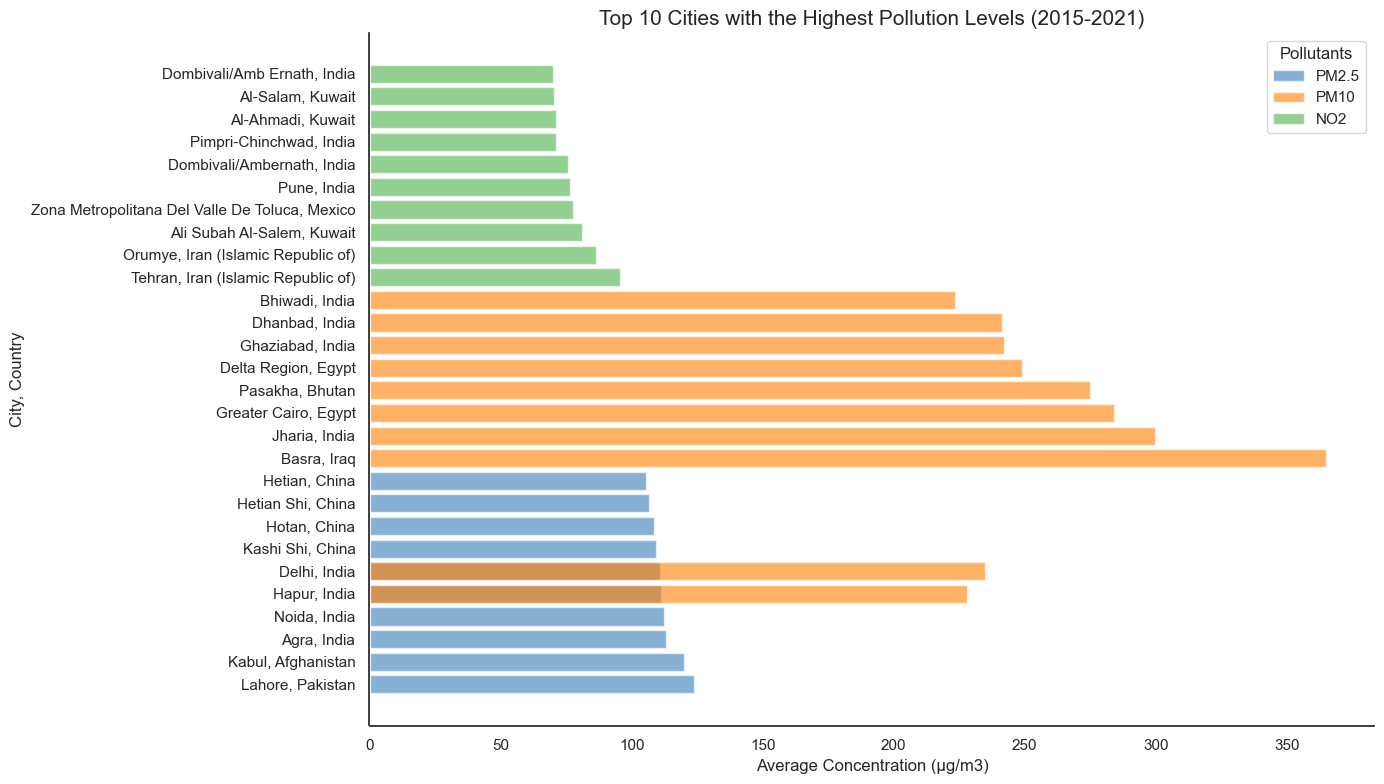

In [30]:
# Modify the name for Iran and include it in the city-country labels
data1['Country'] = data1['Country'].replace('Iran (Islamic Republic of)', 'Iran')
data1['City_Country'] = data1['City/Locality'] + ", " + data['Country']

# Calculate the average pollution levels for the top 10 cities
top_cities_pm25 = data1.groupby('City_Country')['PM2.5(μg/m3)'].mean().sort_values(ascending=False).head(10)
top_cities_pm10 = data1.groupby('City_Country')['PM10(μg/m3)'].mean().sort_values(ascending=False).head(10)
top_cities_no2 = data1.groupby('City_Country')['NO2(μg/m3)'].mean().sort_values(ascending=False).head(10)

# Create a horizontal bar plot 
plt.figure(figsize=(14, 8))
plt.barh(top_cities_pm25.index, top_cities_pm25, color=cmap[0], alpha=0.6, label='PM2.5')
plt.barh(top_cities_pm10.index, top_cities_pm10, color=cmap[1], alpha=0.6, label='PM10')
plt.barh(top_cities_no2.index, top_cities_no2, color=cmap[2], alpha=0.6, label='NO2')
plt.title('Top 10 Cities with the Highest Pollution Levels (2015-2021)', fontsize = '15')
plt.xlabel('Average Concentration (μg/m3)')
plt.ylabel('City, Country')
plt.legend(title='Pollutants')

# Remove the top and right spines from the plots and add some space between the spines and the axes
sns.despine(offset=1) 

plt.tight_layout()
plt.show()
